
isSub =

     1


isSub =

     2


isSub =

     3


isSub =

     4


isSub =

     5


isSub =

     6


isSub =

     7


isSub =

     8


isSub =

     9


isSub =

    10


isSub =

    11


isSub =

    12


isSub =

    13


isSub =

    14


isSub =

    15


isSub =

    16


isSub =

    17


isSub =

    18


isSub =

    19


isSub =

    20


a =

  single

  4.1416e-08


a =

  single

  5.5580e-08


a =

  single

  3.5127e-08


a =

  single

  2.1682e-04


a =

  single

  2.2001e-04


a =

  single

  2.1918e-04




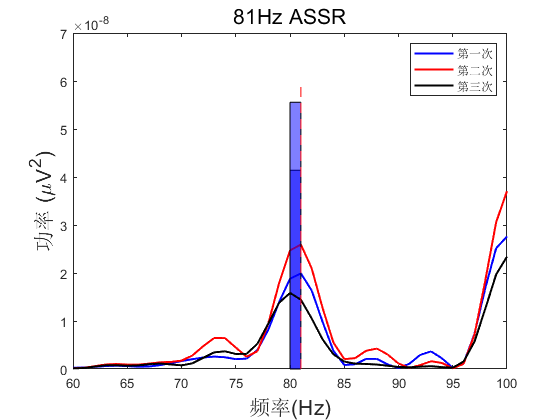

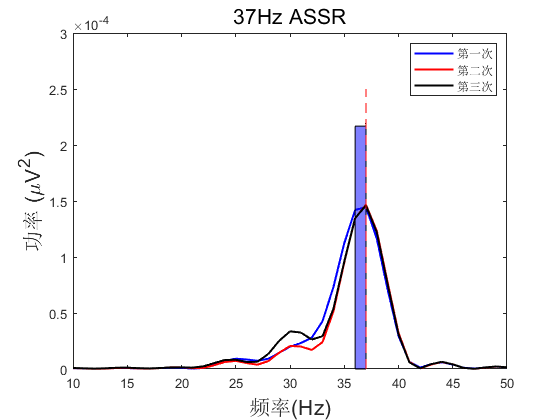

In [6]:
clc
clear
close all
tic
%%
Pathname = ['D:\dataset\健康人数据' filesep 'data_64'] ;
Listing = dir(Pathname) ;
filename = {Listing(3:end).name}' ;
% 获取文件名并使用natsort进行排序
filename = natsort(filename);
time=linspace(-100,600,1400);
for isSub =1:20
    isSub
    Pathname1 = [Pathname filesep filename{isSub}] ;
    Listing1 = dir(Pathname1) ;
    filename1 = {Listing1(3:end).name}' ;
    for days=1:3
        Data=load( [Pathname1 filesep filename1{days} filesep 'ASSR_epoched.mat'] );
        ASSR_37(isSub,days,:,:) = squeeze(mean(Data.STD_37,3));
        ASSR_81(isSub,days,:,:) = squeeze(mean(Data.STD_81,3));
    end
end
%% 组平均-81
ch=6;
Mean_STD_81_day1=squeeze(mean(ASSR_81(:,1,ch,:),1)); %% select the data at Fz, average across subjects, mean_data1: 300*1
Mean_STD_81_day2=squeeze(mean(ASSR_81(:,2,ch,:),1));
Mean_STD_81_day3=squeeze(mean(ASSR_81(:,3,ch,:),1));

figure(1)
y_1=Mean_STD_81_day1;
y_2=Mean_STD_81_day2;
y_3=Mean_STD_81_day3;
%PSD
Fs=2000; %采样频率 f的范围是1/2Fs
nfft = Fs;%采样点通常是5倍的Fs,分辨率为500/（5*500）=0.2Hz
window=boxcar(0.2*Fs);%选择矩形窗和窗长
noverlap=0.1*Fs;  %一般选择2/3的窗长
range='onesided';  % 频率间隔为[0 Fs/2]，只计算一半的频率
[Px1,f1]=pwelch(squeeze(y_1(301:1201)),window,noverlap,nfft,Fs,range);%50-500MS
[Px2,f2]=pwelch(squeeze(y_2(301:1201)),window,noverlap,nfft,Fs,range);%50-500MS
[Px3,f3]=pwelch(squeeze(y_3(301:1201)),window,noverlap,nfft,Fs,range);%50-500MS
%% 显著性
%% 1
mean_81_1 = mean(Px1(76:91));
std_81_1 = std(Px1(76:91));
% 计算z分数
z_score_1 = (squeeze(Px1(76:91)) - mean_81_1) / std_81_1;
% % 假设数据服从正态分布，计算每个点的p值
 %p_values = 2 * (1 - normcdf(abs(z_score_1)));%%双尾
p_values_1 = 1 - normcdf(abs(z_score_1));%单尾
% 第二步：可视化显著区域
% 假设您想要可视化p < alpha的区域
alpha=0.05;
% 创建一个二进制掩码，其中显著区域标记为1
significant_mask_1 = p_values_1 < alpha;
significant_indices_1 = find(significant_mask_1 == 1); % 找到值等于 1 的元素的索引
p_81_1=significant_indices_1+75;
%% 2
mean_81_2 = mean(Px2(76:91));
std_81_2 = std(Px2(76:91));
% 计算z分数
z_score_2 = (squeeze(Px2(76:91)) - mean_81_2) / std_81_2;
% % 假设数据服从正态分布，计算每个点的p值
% p_values = 2 * (1 - normcdf(abs(z_score)));%%双尾
p_values_2 = 1 - normcdf(abs(z_score_2));%单尾
% 第二步：可视化显著区域
% 假设您想要可视化p < alpha的区域
alpha=0.05;
% 创建一个二进制掩码，其中显著区域标记为1
significant_mask_2 = p_values_2 < alpha;
significant_indices_2 = find(significant_mask_2 == 1); % 找到值等于 1 的元素的索引
p_81_2=significant_indices_2+75;
%% 3
mean_81_3 = mean(Px3(76:91));
std_81_3 = std(Px3(76:91));
% 计算z分数
z_score_3 = (squeeze(Px3(76:91)) - mean_81_3) / std_81_3;
% % 假设数据服从正态分布，计算每个点的p值
% p_values = 2 * (1 - normcdf(abs(z_score)));%%双尾
p_values_3 = 1 - normcdf(abs(z_score_3));%单尾
% 第二步：可视化显著区域
% 假设您想要可视化p < alpha的区域
alpha=0.05;
% 创建一个二进制掩码，其中显著区域标记为1
significant_mask_3 = p_values_3 < alpha;
significant_indices_3 = find(significant_mask_3 == 1); % 找到值等于 1 的元素的索引
p_81_3=significant_indices_3+75;

y1=plot(f1,Px1,'b','linewidth', 1.5, 'DisplayName', '第一次');
hold on;
a=max(Px1)*1.5
if ~isempty(p_81_1)
    fill([f1(p_81_1(1)),f1(p_81_1(1)), f1(p_81_1(end)),f1(p_81_1(end))], [0, a, a, 0], 'b', 'FaceAlpha', 0.5);
else
end
hold on
y2=plot(f2,Px2,'r','linewidth', 1.5, 'DisplayName', '第二次');
hold on
a=max(Px2)*1.5
if ~isempty(p_81_2)
    fill([f2(p_81_2(1)), f2(p_81_2(1)), f2(p_81_2(end)), f2(p_81_2(end))], [0, a, a, 0], 'b', 'FaceAlpha', 0.5);
else
end
hold on
y3=plot(f3,Px3,'k','linewidth', 1.5, 'DisplayName', '第三次');
hold on
a=max(Px3)*1.5
if ~isempty(p_81_3)
    fill([f3(p_81_3(1)), f3(p_81_3(1)), f3(p_81_3(end)), f3(p_81_3(end))], [0, a, a, 0], 'b', 'FaceAlpha', 0.5);
else
end
hold on
frequency_to_plot = 81; % 要画的频率为37Hz
[~, index] = min(abs(f1 - frequency_to_plot)); % 查找频率向量中最接近37Hz的频率值的索引
line([f1(index), f1(index)], ylim, 'LineStyle', '--', 'Color', 'r');
xlabel('频率(Hz)','fontsize',16); %% name of X axis
ylabel('功率 (\muV^2)','fontsize',16);  %% name of Y axis
legend([y1, y2, y3], '第一次', '第二次', '第三次', 'Location', 'northeast');
xlim([60 100])
title('81Hz ASSR','fontsize',16); %% specify the figure name
%% 37
Mean_STD_37_day1=squeeze(mean(ASSR_37(:,1,ch,:),1)); %% select the data at Fz, average across subjects, mean_data1: 300*1
Mean_STD_37_day2=squeeze(mean(ASSR_37(:,2,ch,:),1));
Mean_STD_37_day3=squeeze(mean(ASSR_37(:,3,ch,:),1));
figure(2)
y_1=Mean_STD_37_day1;
y_2=Mean_STD_37_day2;
y_3=Mean_STD_37_day3;
%PSD
Fs=2000; %采样频率 f的范围是1/2Fs
nfft = Fs;%采样点通常是5倍的Fs,分辨率为500/（5*500）=0.2Hz
window=boxcar(0.2*Fs);%选择矩形窗和窗长
noverlap=0.1*Fs;  %一般选择2/3的窗长
range='onesided';  % 频率间隔为[0 Fs/2]，只计算一半的频率
[Px1,f1]=pwelch(squeeze(y_1(301:1201)),window,noverlap,nfft,Fs,range);%50-500MS
[Px2,f2]=pwelch(squeeze(y_2(301:1201)),window,noverlap,nfft,Fs,range);%50-500MS
[Px3,f3]=pwelch(squeeze(y_3(301:1201)),window,noverlap,nfft,Fs,range);%50-500MS
%% 显著性
%% 1
mean_37_1 = mean(Px1(31:45));
std_37_1 = std(Px1(31:45));
% 计算z分数
z_score_1 = (squeeze(Px1(31:45)) - mean_37_1) / std_37_1;
% % 假设数据服从正态分布，计算每个点的p值
 %p_values = 2 * (1 - normcdf(abs(z_score_1)));%%双尾
p_values_1 = 1 - normcdf(abs(z_score_1));%单尾
% 第二步：可视化显著区域
% 假设您想要可视化p < alpha的区域
alpha=0.05;
% 创建一个二进制掩码，其中显著区域标记为1
significant_mask_1 = p_values_1 < alpha;
significant_indices_1 = find(significant_mask_1 == 1); % 找到值等于 1 的元素的索引
p_37_1=significant_indices_1+30;
%% 2
mean_37_2 = mean(Px2(31:45));
std_37_2 = std(Px2(31:45));
% 计算z分数
z_score_2 = (squeeze(Px2(31:45)) - mean_37_2) / std_37_2;
% % 假设数据服从正态分布，计算每个点的p值
% p_values = 2 * (1 - normcdf(abs(z_score)));%%双尾
p_values_2 = 1 - normcdf(abs(z_score_2));%单尾
% 第二步：可视化显著区域
% 假设您想要可视化p < alpha的区域
alpha=0.05;
% 创建一个二进制掩码，其中显著区域标记为1
significant_mask_2 = p_values_2 < alpha;
significant_indices_2 = find(significant_mask_2 == 1); % 找到值等于 1 的元素的索引
p_37_2=significant_indices_2+30;
%% 3
mean_37_3 = mean(Px3(31:45));
std_37_3 = std(Px3(31:45));
% 计算z分数
z_score_3 = (squeeze(Px3(31:45)) - mean_37_3) / std_37_3;
% % 假设数据服从正态分布，计算每个点的p值
% p_values = 2 * (1 - normcdf(abs(z_score)));%%双尾
p_values_3 = 1 - normcdf(abs(z_score_3));%单尾
% 第二步：可视化显著区域
% 假设您想要可视化p < alpha的区域
alpha=0.05;
% 创建一个二进制掩码，其中显著区域标记为1
significant_mask_3 = p_values_3 < alpha;
significant_indices_3 = find(significant_mask_3 == 1); % 找到值等于 1 的元素的索引
p_37_3=significant_indices_3+30;

y1=plot(f1,Px1,'b','linewidth', 1.5, 'DisplayName', '第一次');
hold on;
a=max(Px1)*1.5
if ~isempty(p_37_1)
    fill([f1(p_37_1(1)),f1(p_37_1(1)), f1(p_37_1(end)),f1(p_37_1(end))], [0, a, a, 0], 'b', 'FaceAlpha', 0.5);
else
end

hold on
y2=plot(f2,Px2,'r','linewidth', 1.5, 'DisplayName', '第二次');
hold on
a=max(Px2)*1.5
if ~isempty(p_37_2)
    fill([f2(p_37_2(1)), f2(p_37_2(1)), f2(p_37_2(end)), f2(p_37_2(end))], [0, a, a, 0], 'b', 'FaceAlpha', 0.5);
else
end
hold on
y3=plot(f3,Px3,'k','linewidth', 1.5, 'DisplayName', '第三次');
hold on
a=max(Px3)*1.5
if ~isempty(p_37_3)
    fill([f3(p_37_3(1)), f3(p_37_3(1)), f3(p_37_3(end)), f3(p_37_3(end))], [0, a, a, 0], 'b', 'FaceAlpha', 0.5);
else
end
hold on
frequency_to_plot = 37; % 要画的频率为37Hz
[~, index] = min(abs(f1 - frequency_to_plot)); % 查找频率向量中最接近37Hz的频率值的索引
line([f1(index), f1(index)], ylim, 'LineStyle', '--', 'Color', 'r');
xlabel('频率(Hz)','fontsize',16); %% name of X axis
ylabel('功率 (\muV^2)','fontsize',16);  %% name of Y axis
legend([y1, y2, y3], '第一次', '第二次', '第三次', 'Location', 'northeast');
xlim([10 50])
title('37Hz ASSR','fontsize',16); %% specify the figure name